## Import Library

In [1]:
import pandas as pd
import warnings
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

## Read Dataset

In [2]:
dt_train = pd.read_csv("salju_train.csv")
dt_test = pd.read_csv("salju_test.csv")
dt_train.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,...,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,...,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,...,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [3]:
dt_test.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,...,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,...,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,...,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,...,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,...,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


## Data Exploration

#### Data Dimension

In [4]:
dt_train.shape

(109095, 24)

In [5]:
dt_test.shape

(18182, 23)

#### Data Column Info

In [6]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  int64  
 1   Tanggal                   109095 non-null  object 
 2   KodeLokasi                109095 non-null  object 
 3   SuhuMin                   107973 non-null  float64
 4   SuhuMax                   108166 non-null  float64
 5   Hujan                     106664 non-null  float64
 6   Penguapan                 62071 non-null   float64
 7   SinarMatahari             56716 non-null   float64
 8   ArahAnginTerkencang       101351 non-null  object 
 9   KecepatanAnginTerkencang  101399 non-null  float64
 10  ArahAngin9am              101172 non-null  object 
 11  ArahAngin3pm              105898 non-null  object 
 12  KecepatanAngin9am         107742 non-null  float64
 13  KecepatanAngin3pm         106792 non-null  f

In [7]:
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tanggal                   18182 non-null  object 
 1   KodeLokasi                18182 non-null  object 
 2   SuhuMin                   18017 non-null  float64
 3   SuhuMax                   18017 non-null  float64
 4   Hujan                     17795 non-null  float64
 5   Penguapan                 10326 non-null  float64
 6   SinarMatahari             9464 non-null   float64
 7   ArahAnginTerkencang       16901 non-null  object 
 8   KecepatanAnginTerkencang  16908 non-null  float64
 9   ArahAngin9am              16874 non-null  object 
 10  ArahAngin3pm              17686 non-null  object 
 11  KecepatanAngin9am         17984 non-null  float64
 12  KecepatanAngin3pm         17828 non-null  float64
 13  Kelembaban9am             17852 non-null  float64
 14  Kelemb

#### Check Null Data

In [8]:
dt_train.isnull().sum()

id                              0
Tanggal                         0
KodeLokasi                      0
SuhuMin                      1122
SuhuMax                       929
Hujan                        2431
Penguapan                   47024
SinarMatahari               52379
ArahAnginTerkencang          7744
KecepatanAnginTerkencang     7696
ArahAngin9am                 7923
ArahAngin3pm                 3197
KecepatanAngin9am            1353
KecepatanAngin3pm            2303
Kelembaban9am                2002
Kelembaban3pm                3374
Tekanan9am                  11327
Tekanan3pm                  11308
Awan9am                     41844
Awan3pm                     44471
Suhu9am                      1340
Suhu3pm                      2698
BersaljuHariIni              2431
BersaljuBesok                2431
dtype: int64

In [9]:
dt_test.isnull().sum()

Tanggal                        0
KodeLokasi                     0
SuhuMin                      165
SuhuMax                      165
Hujan                        387
Penguapan                   7856
SinarMatahari               8718
ArahAnginTerkencang         1281
KecepatanAnginTerkencang    1274
ArahAngin9am                1308
ArahAngin3pm                 496
KecepatanAngin9am            198
KecepatanAngin3pm            354
Kelembaban9am                330
Kelembaban3pm                548
Tekanan9am                  1865
Tekanan3pm                  1853
Awan9am                     7042
Awan3pm                     7456
Suhu9am                      219
Suhu3pm                      442
BersaljuHariIni              387
BersaljuBesok                419
dtype: int64

### Check Colomn Name

In [10]:
dt_train.columns

Index(['id', 'Tanggal', 'KodeLokasi', 'SuhuMin', 'SuhuMax', 'Hujan',
       'Penguapan', 'SinarMatahari', 'ArahAnginTerkencang',
       'KecepatanAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm',
       'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am',
       'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am', 'Awan3pm',
       'Suhu9am', 'Suhu3pm', 'BersaljuHariIni', 'BersaljuBesok'],
      dtype='object')

In [11]:
#Generate Descriptive Statistic from dt_train
dt_train.describe()

,id,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,109095.000000,107973.000000,108166.000000,106664.000000,62071.000000,56716.000000,101399.000000,107742.000000,106792.000000,107093.000000,105721.000000,97768.000000,97787.000000,67251.000000,64624.000000,107755.000000,106397.000000
mean,54548.000000,12.196183,23.214819,2.385005,5.462440,7.599527,40.032002,14.052115,18.677579,68.895577,51.567626,1017.647080,1015.253117,4.450893,4.516140,16.991391,21.672771
std,31493.158146,6.389419,7.106596,8.588155,4.201638,3.789042,13.617554,8.926092,8.830199,18.995528,20.791573,7.117338,7.047875,2.884566,2.718738,6.477602,6.922833
min,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,27274.500000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,54548.000000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,81821.500000,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,109095.000000,33.900000,47.300000,371.000000,145.000000,14.300000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [12]:
#Generate Descriptive Statistic from dt_test
dt_test.describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,18017.000000,18017.000000,17795.000000,10326.000000,9464.000000,16908.000000,17984.000000,17828.000000,17852.000000,17634.000000,16317.00000,16329.000000,11140.000000,10726.000000,17963.000000,17740.000000
mean,12.233158,23.295604,2.333560,5.509646,7.630135,39.974095,13.971864,18.585540,68.791676,51.438811,1017.56166,1015.181064,4.449820,4.498322,17.048945,21.774408
std,6.433053,7.156981,8.320407,4.159158,3.796355,13.491682,8.828422,8.748586,19.158606,20.799233,7.14728,7.072656,2.890697,2.725233,6.524556,6.978095
min,-7.600000,-2.500000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,2.000000,1.000000,982.30000,984.500000,0.000000,0.000000,-5.200000,-3.700000
25%,7.700000,18.000000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,36.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.700000
50%,12.000000,22.700000,0.000000,4.800000,8.400000,39.000000,13.000000,17.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.800000,21.200000
75%,16.900000,28.300000,0.600000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.30000,1019.900000,7.000000,7.000000,21.600000,26.600000
max,31.400000,48.100000,247.200000,68.800000,14.500000,122.000000,83.000000,83.000000,100.000000,100.000000,1040.60000,1038.400000,8.000000,8.000000,37.700000,46.100000


<AxesSubplot:title={'center':'Data Train Boxplot'}>

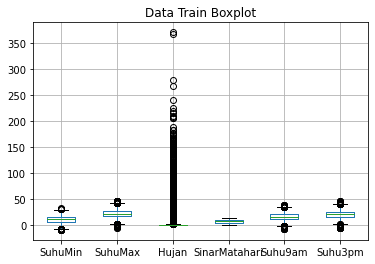

In [13]:
plt.title("Data Train Boxplot")
numerical_col = ['SuhuMin', 'SuhuMax', 'Hujan','SinarMatahari','Suhu9am','Suhu3pm']
dt_train.boxplot(numerical_col,figsize=(18, 8))

<AxesSubplot:title={'center':'Data Test Boxplot'}>

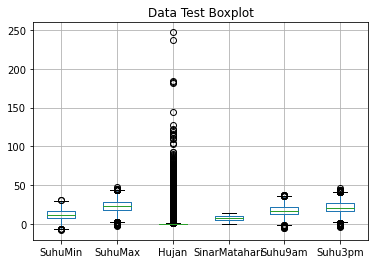

In [14]:
plt.title("Data Test Boxplot")
numerical_col = ['SuhuMin', 'SuhuMax', 'Hujan','SinarMatahari','Suhu9am','Suhu3pm']
dt_test.boxplot(numerical_col,figsize=(15, 8))

<AxesSubplot:xlabel='BersaljuBesok', ylabel='count'>

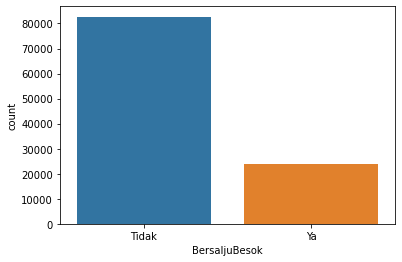

In [15]:
sns.countplot(x='BersaljuBesok', data=dt_train)

<AxesSubplot:xlabel='BersaljuBesok', ylabel='count'>

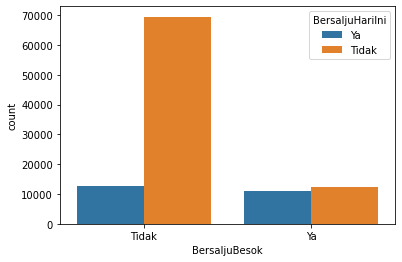

In [16]:
sns.countplot(x='BersaljuBesok', hue='BersaljuHariIni', data=dt_train)

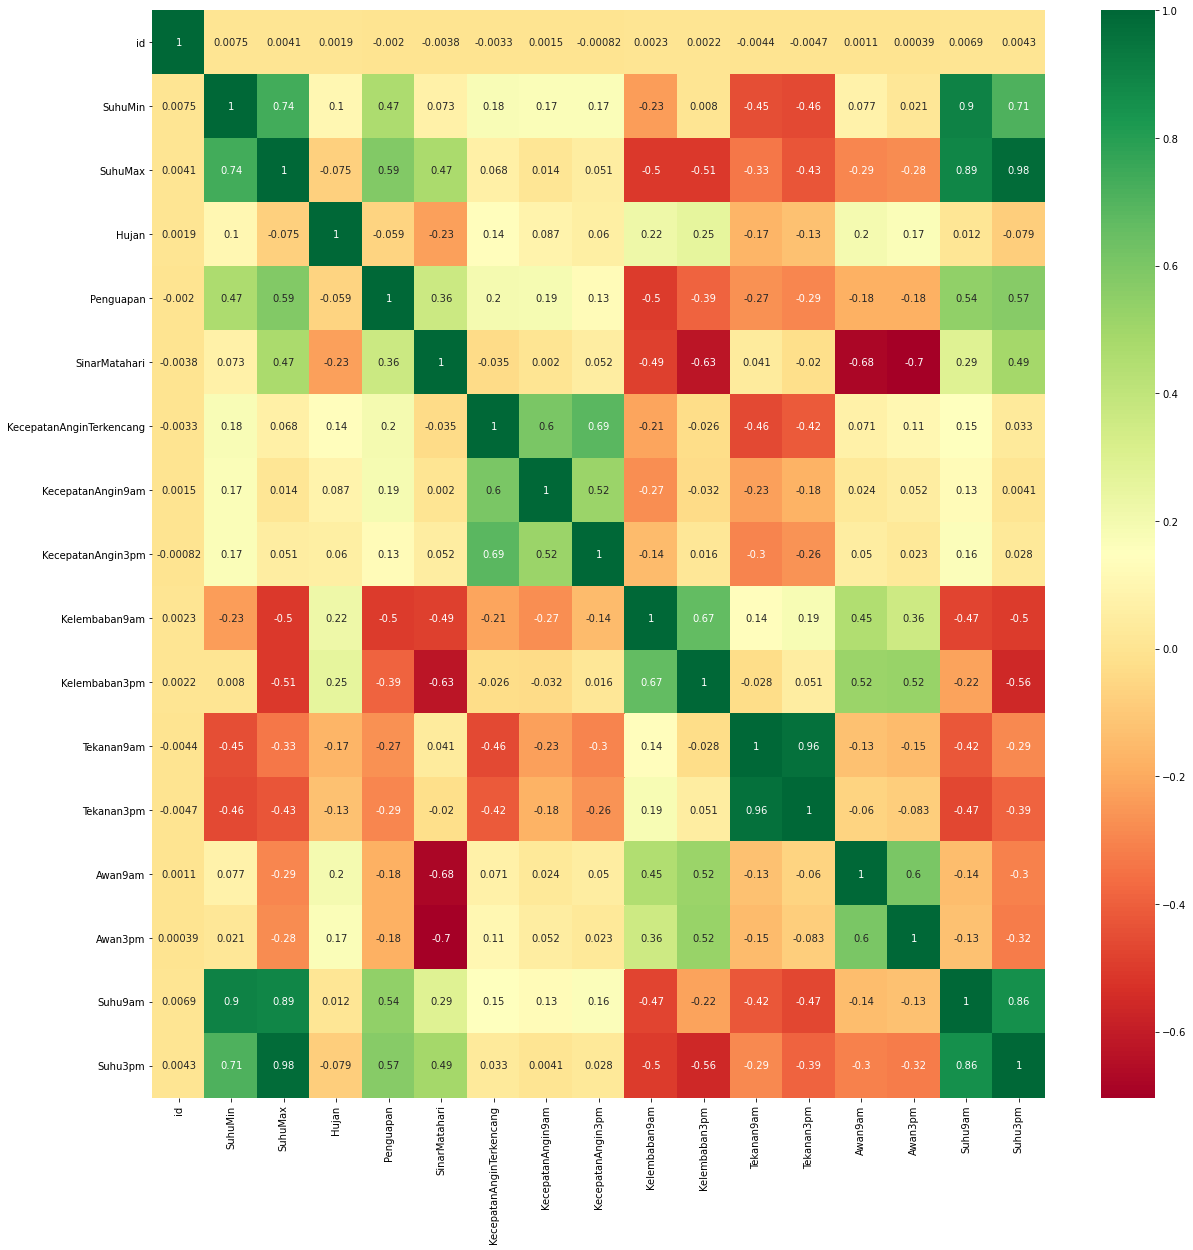

In [17]:
#correlation heatmap
corrmat = dt_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dt_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Data Cleansing

### Dealing Missing Value

In [18]:
#handlemissingNumericalValue
columns = ['SuhuMin', 'SuhuMax', 'Hujan'
       ,'SinarMatahari','Penguapan',
       'KecepatanAnginTerkencang','KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am',
       'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am', 'Awan3pm',
       'Suhu9am', 'Suhu3pm']
for column in columns:
    dt_train[column].fillna(dt_train[column].mean(), inplace=True)
    dt_test[column].fillna(dt_test[column].mean(),inplace=True)

In [19]:
#handlemissingCategoricalValue
categorical_value = ['ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm','BersaljuHariIni','BersaljuBesok']
for column in categorical_value:
    dt_train[column].fillna(dt_train[column].value_counts().index[0],inplace=True)
    dt_test[column].fillna(dt_test[column].value_counts().index[0],inplace=True)

In [20]:
#cek dt_train is null
dt_train.isnull().sum()

id                          0
Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

In [21]:
#cek dt_test is null
dt_test.isnull().sum()

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

### Dropping Duplicates

In [22]:
dt_test = dt_test.drop_duplicates()

In [23]:
dt_train = dt_train.drop_duplicates()

### Pick Important Columns

In [24]:
dt_train = dt_train[['SuhuMin', 'SuhuMax', 'Hujan','SinarMatahari','Suhu9am','Suhu3pm','BersaljuHariIni','BersaljuBesok']]

In [25]:
dt_test = dt_test[['SuhuMin', 'SuhuMax', 'Hujan','SinarMatahari','Suhu9am','Suhu3pm','BersaljuHariIni','BersaljuBesok']]

In [26]:
dt_train

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,10.4,15.5,4.8,7.599527,13.1,15.0,Ya,Tidak
1,9.0,17.0,8.0,7.400000,11.9,15.5,Ya,Ya
2,18.2,32.0,0.0,7.599527,23.8,29.6,Tidak,Tidak
3,7.3,24.5,0.0,10.400000,15.3,23.2,Tidak,Tidak
4,5.9,20.3,0.0,12.600000,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...
109090,20.1,23.7,0.0,8.900000,22.0,22.1,Tidak,Ya
109091,15.7,25.2,0.0,7.599527,23.8,24.4,Tidak,Ya
109092,7.5,20.4,1.6,7.599527,12.6,19.8,Ya,Tidak
109093,10.8,29.8,0.0,11.200000,21.7,29.2,Tidak,Tidak


In [27]:
dt_test

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,11.0,27.5,0.0,6.400000,25.7,23.6,No,No
1,10.0,19.9,0.2,7.630135,10.7,18.9,No,Yes
2,9.2,27.2,0.0,10.400000,13.9,26.3,No,No
3,17.7,27.0,0.0,6.700000,22.3,26.4,No,No
4,2.3,7.9,88.0,7.630135,4.4,6.0,Yes,No
...,...,...,...,...,...,...,...,...
18177,7.8,25.8,0.0,13.200000,16.8,24.0,No,No
18178,12.4,26.6,0.0,11.600000,17.1,25.7,No,No
18179,6.7,22.9,0.0,7.630135,11.8,22.0,No,No
18180,12.5,26.7,0.0,10.800000,22.9,25.4,No,No


### Dealing Outliers

In [28]:
#dropOutlierUsingIQR
q1 = dt_train.quantile(0.25)
q3 = dt_train.quantile(0.75)
IQR = q3 - q1
low = q1 - 1.5*IQR
high = q3 + 1.5*IQR
dt_trainset = dt_train[~((dt_train < (q1 - 1.5 * IQR)) |(dt_train > (q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
#dropOutlierUsingIQR
q1 = dt_test.quantile(0.25)
q3 = dt_test.quantile(0.75)
IQR = q3 - q1
low = q1 - 1.5*IQR
high = q3 + 1.5*IQR
dt_testset = dt_test[~((dt_test < (q1 - 1.5 * IQR)) |(dt_test > (q3 + 1.5 * IQR))).any(axis=1)]

In [30]:
dt_trainset

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
2,18.2,32.0,0.000000,7.599527,23.8,29.6,Tidak,Tidak
6,7.7,18.7,0.200000,9.700000,11.3,18.3,Tidak,Tidak
10,-0.3,10.5,0.000000,7.599527,4.7,9.3,Tidak,Tidak
11,-2.6,11.1,0.200000,6.500000,0.8,9.9,Tidak,Tidak
12,12.3,17.0,0.000000,7.599527,14.2,14.9,Tidak,Ya
...,...,...,...,...,...,...,...,...
109087,5.1,23.4,0.000000,7.599527,13.1,22.5,Tidak,Tidak
109089,18.7,23.9,2.385005,7.599527,21.2,22.4,Tidak,Tidak
109090,20.1,23.7,0.000000,8.900000,22.0,22.1,Tidak,Ya
109091,15.7,25.2,0.000000,7.599527,23.8,24.4,Tidak,Ya


In [31]:
dt_testset

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,11.0,27.5,0.00000,6.400000,25.7,23.6,No,No
1,10.0,19.9,0.20000,7.630135,10.7,18.9,No,Yes
3,17.7,27.0,0.00000,6.700000,22.3,26.4,No,No
5,18.4,33.1,0.20000,7.630135,24.1,24.4,No,No
15,10.5,28.0,0.00000,7.630135,19.7,27.2,No,No
...,...,...,...,...,...,...,...,...
18173,15.0,33.9,2.33356,7.630135,22.5,33.0,No,No
18174,14.6,27.8,0.00000,10.100000,22.8,25.3,No,No
18175,8.3,21.5,0.00000,7.630135,14.1,21.1,No,No
18176,2.6,19.2,0.00000,7.630135,7.7,18.5,No,No


## Feature Engineering

### Categorical Encoding

In [32]:
#Transform BersaljuHariIni to numerical value [0 == Tidak and 1 == Yes]
dt_trainset.loc[dt_trainset.BersaljuHariIni == "Tidak", "BersaljuHariIni"] = 0
dt_trainset.loc[dt_trainset.BersaljuHariIni == "Ya", "BersaljuHariIni"] = 1
dt_testset.loc[dt_test.BersaljuHariIni == "No", "BersaljuHariIni"] = 0
dt_testset.loc[dt_test.BersaljuHariIni == "Yes", "BersaljuHariIni"] = 1

In [33]:
#Transform BersaljuBesok to numerical value [0 == Tidak and 1 == Yes]
dt_testset.loc[dt_test.BersaljuBesok == "No", "BersaljuBesok"] = 0
dt_testset.loc[dt_test.BersaljuBesok == "Yes", "BersaljuBesok"] = 1
dt_trainset.loc[dt_trainset.BersaljuBesok == "Tidak", "BersaljuBesok"] = 0
dt_trainset.loc[dt_trainset.BersaljuBesok == "Ya", "BersaljuBesok"] = 1

### Scaling

In [34]:
#Scaling using MinMaxScaler()
colom = dt_trainset.columns
scaler = preprocessing.MinMaxScaler()
dt_trainset = scaler.fit_transform(dt_trainset)
dt_testset = scaler.fit_transform(dt_testset)
dt_trainset = pd.DataFrame(dt_trainset, columns = colom)
dt_testset = pd.DataFrame(dt_testset, columns = colom)

In [35]:
dt_trainset

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,0.667590,0.717445,0.000000,0.371983,0.688705,0.715040,0.0,0.0
1,0.376731,0.390663,0.080000,0.860465,0.344353,0.416887,0.0,0.0
2,0.155125,0.189189,0.000000,0.371983,0.162534,0.179420,0.0,0.0
3,0.091413,0.203931,0.080000,0.116279,0.055096,0.195251,0.0,0.0
4,0.504155,0.348894,0.000000,0.371983,0.424242,0.327177,0.0,1.0
...,...,...,...,...,...,...,...,...
62580,0.304709,0.506143,0.000000,0.371983,0.393939,0.527704,0.0,0.0
62581,0.681440,0.518428,0.954002,0.371983,0.617080,0.525066,0.0,0.0
62582,0.720222,0.513514,0.000000,0.674419,0.639118,0.517150,0.0,1.0
62583,0.598338,0.550369,0.000000,0.371983,0.688705,0.577836,0.0,1.0


In [36]:
dt_testset

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,0.476190,0.605839,0.000000,0.071429,0.739726,0.549738,0.0,0.0
1,0.448179,0.420925,0.083333,0.364318,0.328767,0.426702,0.0,1.0
2,0.663866,0.593674,0.000000,0.142857,0.646575,0.623037,0.0,0.0
3,0.683473,0.742092,0.083333,0.364318,0.695890,0.570681,0.0,0.0
4,0.462185,0.618005,0.000000,0.364318,0.575342,0.643979,0.0,0.0
...,...,...,...,...,...,...,...,...
10367,0.588235,0.761557,0.972317,0.364318,0.652055,0.795812,0.0,0.0
10368,0.577031,0.613139,0.000000,0.952381,0.660274,0.594241,0.0,0.0
10369,0.400560,0.459854,0.000000,0.364318,0.421918,0.484293,0.0,0.0
10370,0.240896,0.403893,0.000000,0.364318,0.246575,0.416230,0.0,0.0


## Convert to CSV Dataset After Preprocessing

In [37]:
dt_trainset.to_csv(r'dataset_trainafterpreprocessing.csv',index = False)

In [38]:
dt_testset.to_csv(r'dataset_testafterpreprocessing.csv',index = False)

## Data Spliting

In [39]:
#spliting train and test
X_train = dt_trainset.drop(['BersaljuBesok'], axis='columns')
y_train = dt_trainset.BersaljuBesok
x_test = dt_testset.drop(['BersaljuBesok'], axis='columns')
y_test = dt_testset.BersaljuBesok
y_test =y_test.astype('int')
y_train = y_train.astype('int')

In [40]:
#check size of the training and test dataset
print(len(X_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

62585
62585
10372
10372


## Clasification using Logistic Regression

In [41]:
#KlasifikasiLogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(x_test)

Text(0.5, 1.0, 'Confusion Matrix using Logistic Regression')

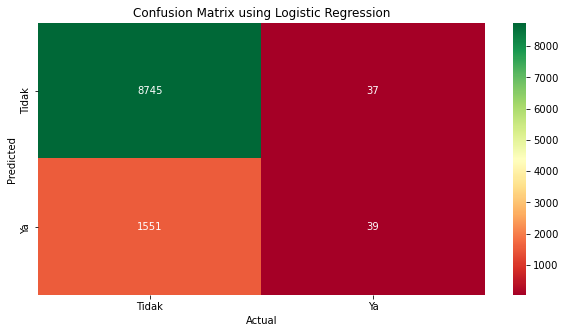

In [42]:
#find Confusion Matrix from Logistic Regression
conf_matrix = pd.DataFrame(confusion_matrix(y_test, predictions),columns =['Tidak','Ya'],index=['Tidak','Ya'])
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix,annot=True,cmap="RdYlGn",fmt='d')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix using Logistic Regression')

In [43]:
#Show Performance Metric
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8782
           1       0.51      0.02      0.05      1590

    accuracy                           0.85     10372
   macro avg       0.68      0.51      0.48     10372
weighted avg       0.80      0.85      0.78     10372



### Hyperparameter Tuning Logistic Regression

In [44]:
#Logistic Regression with Hyperparameter Tuning
logModel = LogisticRegression()
penalty = ['l1','l2']
C = np.logspace(-4,4,20)
hyperparameters = dict(penalty=penalty, C=C)

In [45]:
clf = GridSearchCV(logModel, hyperparameters, cv=5, verbose=True,n_jobs=-1)

In [46]:
new_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [47]:
#show best parameter for logistic regression
print(new_clf.best_estimator_.get_params()['penalty'])
print(new_clf.best_estimator_.get_params()['C'])

l2
0.03359818286283781


In [48]:
#build new model after hyperparameter tuning
lr = LogisticRegression(penalty='l2',C = 0.03359818286283781)
lr.fit(X_train, y_train)
predictions = lr.predict(x_test)

Text(0.5, 1.0, 'Confusion Matrix using Logistic Regression after hyperparameter tuning')

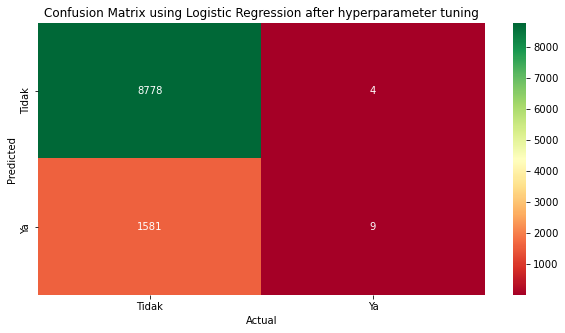

In [49]:
#show confusion matrix from Logistic Regression after Hyperparameter Tuning
conf_matrix = pd.DataFrame(confusion_matrix(y_test, predictions),columns =['Tidak','Ya'],index=['Tidak','Ya'])
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix,annot=True,cmap="RdYlGn",fmt='d')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix using Logistic Regression after hyperparameter tuning')

In [50]:
#Show Performance Metric 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8782
           1       0.69      0.01      0.01      1590

    accuracy                           0.85     10372
   macro avg       0.77      0.50      0.46     10372
weighted avg       0.82      0.85      0.78     10372



## Classification using KNN

In [51]:
#build model for KNN
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(x_test)

Text(0.5, 1.0, 'Confusion Matrix using kNN')

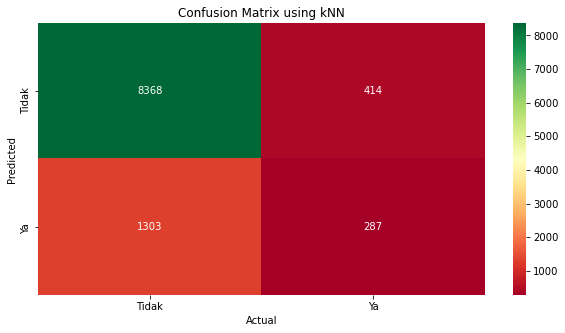

In [52]:
#show confusion matrix from kNN
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred),columns =['Tidak','Ya'],index=['Tidak','Ya'])
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix,annot=True,cmap="RdYlGn",fmt='d')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix using kNN')

In [53]:
#Show Performance Metric 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8782
           1       0.41      0.18      0.25      1590

    accuracy                           0.83     10372
   macro avg       0.64      0.57      0.58     10372
weighted avg       0.80      0.83      0.81     10372



### Hyperparameter Tuning kNN

In [54]:
#hyperparameter for kNN
weights = ['uniform','distance']
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(weights=weights,n_neighbors=n_neighbors,p=p)

In [55]:
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=3,verbose=True,n_jobs=-1)

In [56]:
best_model_knn = clf.fit(X_train,y_train)
print('weight :',best_model_knn.best_estimator_.get_params()['weights'])
print('n_neighbors :',best_model_knn.best_estimator_.get_params()['n_neighbors'])
print('p : ',best_model_knn.best_estimator_.get_params()['p'])

Fitting 3 folds for each of 116 candidates, totalling 348 fits
weight : distance
n_neighbors : 29
p :  2


In [57]:
#create new model with hyperparameter
knn = KNeighborsClassifier(weights='distance',n_neighbors=29,p=2)
knn_newmodel = knn.fit(X_train, y_train)
y_pred = knn_newmodel.predict(x_test)

Text(0.5, 1.0, 'Confusion Matrix using kNN after hyperparameter tuning')

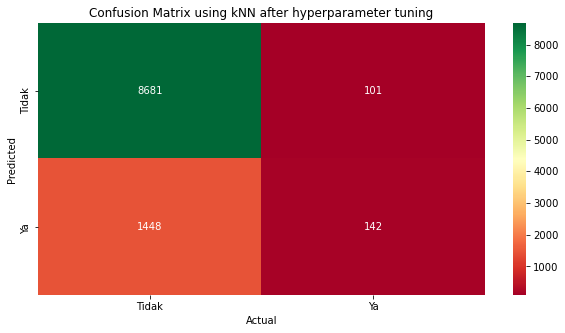

In [58]:
#confusion matrix from kNN with hyperparameter tuning
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred),columns =['Tidak','Ya'],index=['Tidak','Ya'])
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix,annot=True,cmap="RdYlGn",fmt='d')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix using kNN after hyperparameter tuning')

In [59]:
#Show Performance Metric kNN after hyperparameter tuning
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8782
           1       0.58      0.09      0.15      1590

    accuracy                           0.85     10372
   macro avg       0.72      0.54      0.54     10372
weighted avg       0.82      0.85      0.80     10372

